In [1]:
!pip install yfinance
import yfinance as yf # https://pypi.org/project/yfinance/
import math
### the meaning of prediction about stock market
from numpy.core.numeric import ones_like
import random
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


[*********************100%***********************]  1 of 1 completed


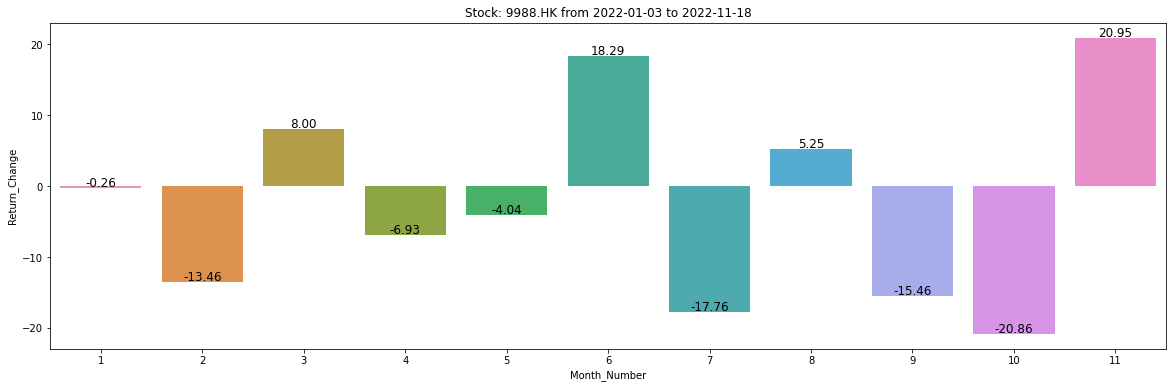

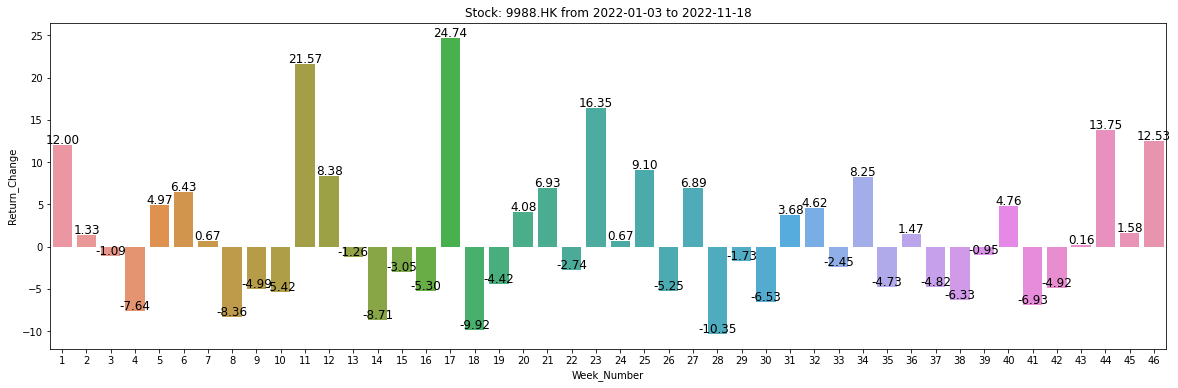

In [2]:
# get data by ticker-name, start-time & end-time
def get_df_data(ticker_name="AAPL", start_time="2022-01-01", end_time="2022-10-09"):
  df_data = yf.download(tickers=ticker_name, start=start_time, end=end_time) 
  #df_data.head()
  return df_data

# calculate the daily return by (current_index - previous_index) / previous_index
def calculate_daily_return(df_data, OHLC_index="Close"):
  name1 = OHLC_index+"_previous"
  df_data[name1] = df_data[OHLC_index].shift(1)
  name2 = OHLC_index+"_delta"
  df_data[name2] = df_data[OHLC_index] - df_data[name1]
  name3 = OHLC_index+"_return"
  df_data[name3] = df_data[name2] / df_data[name1]
  del df_data[name1]
  del df_data[name2]
  new_feature = name3
  return df_data #, new_feature

# get the market movement (yesterday -> today) based on daily return, 
  # 1 means rise and 0 fall
def get_market_movement(df_data, signal_name="Close_return"):
  df_data["movement"] = df_data[signal_name]>0
  df_data["movement"] = df_data["movement"].astype(int)
  return df_data

# convert the time to be string type: yyyy-mm-dd
  # get month number & week number
def get_ymt_date(df_data):
  df_data["ymd_time"] = df_data.index
  df_data["ymd_time"] = df_data["ymd_time"].astype(str)
  df_data["ymd_time"] = df_data["ymd_time"].str.slice(0,10)
  # month
  df_data["monthNumber"] = df_data["ymd_time"].str.slice(5,7)
  df_data["monthNumber"] = df_data["monthNumber"].astype(int)
  # week
  df_data['ymd_time'] = pd.to_datetime(df_data['ymd_time'], errors ='coerce')
  df_data['weekNumber'] = df_data['ymd_time'].dt.isocalendar().week
  return df_data

# calculate the monthly return
def month_change(df_data, feature="Close"):
    x, y = [], []
    months = set( list(df_data['monthNumber']) )
    for m in list(months)[:]:
        tmp_df = df_data[ df_data['monthNumber']==m ]
        tmp_list = tmp_df[feature]
        m_start, m_end = tmp_list[0], tmp_list[-1]
        change = (m_end - m_start)/m_start * 100
        x.append(m)
        y.append(change)
        #print(m_start, m_end)
    return x, y

# calculate the weekly return
def week_change(df_data, feature="Close"):
    x, y = [], []
    weeks = set( list(df_data['weekNumber']) )
    for w in list(weeks)[:]:
        tmp_df = df_data[ df_data['weekNumber']==w ]
        tmp_list = tmp_df[feature]
        w_start, w_end = tmp_list[0], tmp_list[-1]
        change = (w_end - w_start)/w_start * 100
        x.append(w)
        y.append(change)
    return x, y

# draw bar chart
def draw_bar(x_axis, y_axis, x_name, y_name, tn, title_name="", xt=None):
    data = {
            x_name: x_axis,
            y_name: y_axis
           }
    df = pd.DataFrame(data, columns=[x_name, y_name])
    # Defining the plot size
    # Defining the values for x-axis, y-axis
    # and from which dataframe the values are to be picked
    fig, ax = plt.subplots(figsize=(20, 6))
    plots = sns.barplot(x=x_name, y=y_name, data=df)
    if xt is not None:
        ax.set_xticks(x_axis)
        ax.set_xticklabels(xt)

    # Iterrating over the bars one-by-one
    for bar in plots.patches:
        # Using Matplotlib's annotate function and
        # passing the coordinates where the annotation shall be done
        plots.annotate(format(bar.get_height(), '.2f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=12, xytext=(0, 5),
                       textcoords='offset points')
    # Setting the title for the graph
    plt.title("Stock: " + tn + " " + title_name)
    # Finally showing the plot
    plt.show()
    return 

###
# 0005.HK:滙豐控股, 1299.HK:友邦保險, 0700.HK:騰訊控股, 9988.HK:阿⾥巴巴, 3690.HK:美團 # AAPL
hk_tickers = ["3690.HK", "9618.HK", "1024.HK", "9866.HK"]
tn = "9988.HK" 
st, et = "2022-01-01", "2022-12-31"
df_data = get_df_data(ticker_name=tn, start_time=st, end_time=et)
df_data = calculate_daily_return(df_data)
df_data = get_market_movement(df_data)
df_data = get_ymt_date(df_data)

date_list = list(df_data.index)
start_date, end_date = date_list[0], date_list[-1]
start_date, end_date = str(start_date)[:10], str(end_date)[:10]
title_name = "from " + start_date + " to " + end_date
# graph: monthly return 
x_axis, y_axis = month_change(df_data, "Close")
x_name, y_name = "Month_Number", "Return_Change"
draw_bar(x_axis, y_axis, x_name, y_name, tn, title_name)
# graph: weekly return 
x_axis, y_axis = week_change(df_data, "Close")
x_name, y_name = "Week_Number", "Return_Change"
draw_bar(x_axis, y_axis, x_name, y_name, tn, title_name)

In [6]:


# get data by ticker-name, start-time & end-time
def get_df_data(ticker_name="AAPL", start_time="2022-01-01", end_time="2022-10-09"):
  df_data = yf.download(tickers=ticker_name, start=start_time, end=end_time) 
  #df_data.head()
  return df_data

# calculate the daily return by (current_index - previous_index) / previous_index
def calculate_daily_return(df_data, OHLC_index="Close"):
  name1 = OHLC_index+"_previous"
  df_data[name1] = df_data[OHLC_index].shift(1)
  name2 = OHLC_index+"_delta"
  df_data[name2] = df_data[OHLC_index] - df_data[name1]
  name3 = OHLC_index+"_return"
  df_data[name3] = df_data[name2] / df_data[name1]
  del df_data[name1]
  del df_data[name2]
  new_feature = name3
  return df_data #, new_feature

# get the market movement (yesterday -> today) based on daily return, 
  # 1 means rise and 0 fall
def get_market_movement(df_data, signal_name="Close_return"):
  df_data["movement"] = df_data[signal_name]>0
  df_data["movement"] = df_data["movement"].astype(int)
  return df_data

# convert the time to be string type: yyyy-mm-dd
  # get month number & week number
def get_ymt_date(df_data):
  df_data["ymd_time"] = df_data.index
  df_data["ymd_time"] = df_data["ymd_time"].astype(str)
  df_data["ymd_time"] = df_data["ymd_time"].str.slice(0,10)
  # month
  df_data["monthNumber"] = df_data["ymd_time"].str.slice(5,7)
  df_data["monthNumber"] = df_data["monthNumber"].astype(int)
  # week
  df_data['ymd_time'] = pd.to_datetime(df_data['ymd_time'], errors ='coerce')
  df_data['weekNumber'] = df_data['ymd_time'].dt.isocalendar().week
  return df_data

# calculate basic-level strategy: buy & hold
def basic_level_strategy(df_data, feature_name="Close_return"):
  daily_return_list = list( df_data[feature_name] )
  base_money = 1.0
  for change in daily_return_list:
    # math.isnan(daily_return_list[0])
    if not math.isnan(change):
      base_money = base_money * (1+change)
  return base_money

# how much n% correct prediction is robust enough to earn money 
# suppose that: n% prediction is correct, 1-n% prediction is incorrect
# while the order is random, to analyze the robustness
# for example, 4-day stocks, 0 means wrong prediction, 1 means right prediction
  # [0, 1, 0, 1], [1, 1, 0, 0] are 2 types of prediction / 2 permutations
    # with the same percentatge correct prediction: 50%, 
    # while they may have different returns
# this function is to generate huge amount of permutations to simulate big-data analysis
  # to figure out the how much percentage to earn money 
  # for certain percentage correct prediction
def generate_permutation(random_seed, list_len, accuracy_ratio):
  ones = int(accuracy_ratio * list_len)
  zeros = list_len - ones
  a_list = []
  for i in range(ones):
    a_list.append(1)
  for i in range(zeros):
    a_list.append(0)
  random.seed(random_seed)
  random.shuffle(a_list)
  return a_list

# trade under the algorithmic strategy
def algo_trading_strategy(interest_accumulate):
  # calculate the profit according to the above trading position
    # suppose the bid/ask fee is 0.25% (HSBC) every position change
  transact_fee = -0.25 * 0.01
  profit = 1.0
  position = "short" # short means not in the market or exit
  enter_market = False
  for it in interest_accumulate:
    ymd, close, signal = it
    if signal=="long":
      if position != signal:
        profit = profit * (1+transact_fee) # enter market
      profit = profit * (1+close)
      position = signal
    else:
      if position != signal:
        profit = profit * (1+transact_fee) # exit market
      position = signal    
  #print("predict_"+str(accuracy_ratio*100)+": ", profit)
  return profit

# use Mont Carlo simulation to generate random samples
  # to approach the probability of truth 
def Mont_Carlo_simulation(tmp_data, random_seed=10, accuracy_ratio=0.6):
  df_data = tmp_data.copy()
  #print("buy_and_hold 1: ", buy_and_hold, "buy_and_hold 2: ", buy_and_hold)
    # generate random permutations,
    # namely, the prediction of movement: rise 1 / fall 0
  list_len = len(df_data)
  predict_list = generate_permutation(random_seed, list_len, accuracy_ratio)
    # get the real movement of the stock
  ymd_time, Close_return = list(df_data["ymd_time"]), list(df_data["Close_return"])
  movement = list(df_data["movement"])
  assert len(ymd_time)==len(predict_list)
    # simulate the algorithmic trading according to prediction about movement
      # the prediction about movement is of certain accuracy
  interest_accumulate = []
  ii = 0
  while ii < list_len:
    ymd = ymd_time[ii]
    close = Close_return[ii] # daily return 
    move = movement[ii] # the movement, that is, 1 for positive daily return, 0 for negative
    predict = predict_list[ii]
    if predict == 1: # predict accurately, 
          # if movement is rise then buy and get the interest, 
          # if movement is fall the do nothing (short) and avoid the loss
      #interest_accumulate.append( (ymd, close, move, 1) )
      if move==1:
        interest_accumulate.append( (ymd, close, "long") )
      else:
        interest_accumulate.append( (ymd, close, "short") )
      #
    else: # predict inaccurately
          # if movement is rise then do nothing (short) and miss the interest, 
          # if movement is fall then buy and get the loss
      #interest_accumulate.append( (ymd, close, move, 0) )
      if move==1:
        interest_accumulate.append( (ymd, close, "short") )
      else:
        interest_accumulate.append( (ymd, close, "long") )
    ii += 1
  return interest_accumulate


# calculate common statistical indicators for list-type data, such as: max, min, avg/mean, median, 10-percentile, 90-percentile
def statistical_indicators(tmp_list):
  tmp_list = sorted(tmp_list)
  L = len(tmp_list)
  mx, mn = max(tmp_list), min(tmp_list)
  avg = sum(tmp_list)/len(tmp_list)
  med = tmp_list[L//2]
  last_10 = tmp_list[ int(L*0.1) ]
  first_10 = tmp_list[ int(L*0.9) ]
  return mx, mn, avg, med, first_10, last_10

### permutation calculator
# it does not consider the order, so it is Cn
def permutation_Cn(n, m):
  print(n, m)
  # n! / ( m! * (n-m)! )
    # v1 = (m+1)*(m+2)*...*n 
    # v2 = 1*2*..*(n-m)
    # v3 = v1/v2
  v1 = 1
  i = m+1
  while i<=n:
    v1 = v1 * i
    i += 1
  v2 = 1
  i = 1
  while i<=(n-m):
    v2 = v2 * i
    i += 1
  return v1, v2, round(v1/v2)

#n, m = 40, 20
#permutation_Cn(n, m)


# check the prediction meaning, how much accuracy of prediction will be robust enough to make money
def prediction_analysis(tn="9888.HK", st="2022-01-01", et="2022-12-31"):
    predict_accuracy_list = []
    win_ratio_list = []
    basic_level_list = []
    max_predict_list = []
    min_predict_list = []
    avg_predict_list = []
    med_predict_list = []
    f10_predict_list = []
    l10_predict_list = []
    #
    df_data = get_df_data(ticker_name=tn, start_time=st, end_time=et)
    df_data = get_ymt_date(df_data)
    df_data = calculate_daily_return(df_data)
    df_data = get_market_movement(df_data)
    df_data = df_data.dropna()
    #
    simulation_data = {}
    offset_profit = 0.01
    set_accuracy = 0.50
    for ii in range(0, 5):
        
        win_loss_list = []
        return_list = []

        permutation_n = len(df_data)
        permutation_m = int(permutation_n * set_accuracy)
        pv1, pv2, pv3 = permutation_Cn(permutation_n, permutation_m)
        print( "--------------------------------------> ",  pv1, pv2, pv3)
        simulation_times = pv3 * 2
        print( "simulation times: ", simulation_times)

        for rs in range(simulation_times): # 
            # basic level strategy
            buy_and_hold = df_data["Close"][-1]/df_data["Close"][0]
            buy_and_hold = basic_level_strategy(df_data)
            # algo_trading_strategy
            interest_accumulate = Mont_Carlo_simulation(df_data, rs, set_accuracy)
            profit = algo_trading_strategy(interest_accumulate)
            #print( buy_and_hold, profit )
            if profit>buy_and_hold+offset_profit:
                win_loss_list.append(1)
            else:
                win_loss_list.append(0)
            return_list.append( profit )
        simulation_data[round(set_accuracy, 2)] = return_list
        win, loss = sum(win_loss_list), len(win_loss_list)-sum(win_loss_list)
        mx, mn, avg, med, first_10, last_10 = statistical_indicators(return_list)
        #max_profit, min_profit, avg_profit = round(max(return_list), 2), round(min(return_list), 2), round(sum(return_list)/len(return_list), 2)
        #print(set_year, "\t", round(set_accuracy*100), "% accuracy \t", win, loss, round(win/(win+loss)*100, 2))
        #print("\t", max_profit, min_profit, avg_profit, round(buy_and_hold, 2))
        #
        predict_accuracy_list.append( round(set_accuracy*100) )
        win_ratio_list.append( round(win/(win+loss), 2) )
        basic_level_list.append( round(buy_and_hold, 2) )
        max_predict_list.append( mx )
        min_predict_list.append( mn )
        avg_predict_list.append( avg )
        med_predict_list.append( med )
        f10_predict_list.append( first_10 )
        l10_predict_list.append( last_10 )
        if set_accuracy>=0.65:
            print( buy_and_hold, "\t", round(set_accuracy, 2), mn, last_10 )
        set_accuracy += 0.05
    ys = [
      win_ratio_list, basic_level_list,
      max_predict_list, min_predict_list, avg_predict_list,
      med_predict_list, f10_predict_list, l10_predict_list
      ]
    return predict_accuracy_list, ys, simulation_data

# draw lines, those lines share the same x values, but different y values
def draw_lines(x, ys):
    predict_accuracy_list = x
    [
      win_ratio_list, basic_level_list,
      max_predict_list, min_predict_list, avg_predict_list,
      med_predict_list, f10_predict_list, l10_predict_list
      ] = ys
    #
    fig = plt.subplots(figsize =(12, 6))
    plt.plot(predict_accuracy_list, win_ratio_list, label ='win_ratio_list') # , color ='r'
    plt.plot(predict_accuracy_list, basic_level_list, label ='basic_level_list')
    plt.plot(predict_accuracy_list, max_predict_list, label ='max_predict_list')
    plt.plot(predict_accuracy_list, min_predict_list, label ='min_predict_list')
    plt.plot(predict_accuracy_list, avg_predict_list, label ='avg_predict_list')
    plt.plot(predict_accuracy_list, med_predict_list, label ='med_predict_list')
    plt.plot(predict_accuracy_list, f10_predict_list, label ='f10_predict_list')
    plt.plot(predict_accuracy_list, l10_predict_list, label ='l10_predict_list')
    plt.plot(predict_accuracy_list, [1]*len(win_ratio_list), label ='100% groud-level')
    #
    plt.title("the meaning of stock prediction: " + tn)
    plt.xlabel('prediction accuracy')
    plt.ylabel("related analysis")
    #
    plt.legend()
    plt.show()
    return



[*********************100%***********************]  1 of 1 completed
19 10
-------------------------------------->  33522128640 362880 92378
simulation times:  184756
19 11
-------------------------------------->  3047466240 40320 75582
simulation times:  151164
19 12
-------------------------------------->  253955520 5040 50388
simulation times:  100776
0.9565217391304351 	 0.65 0.8562824291003199 0.965205617482831
19 13
-------------------------------------->  19535040 720 27132
simulation times:  54264
0.9565217391304351 	 0.7 0.9003735424901311 0.9968070256795517
19 14
-------------------------------------->  1395360 120 11628
simulation times:  23256
0.9565217391304351 	 0.75 0.9315430547511734 1.0286864010947272


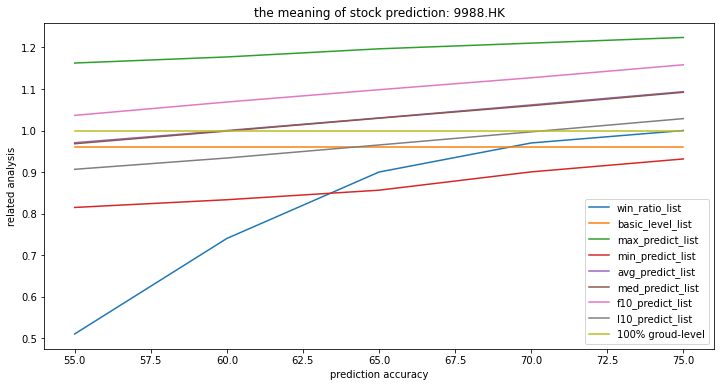

[*********************100%***********************]  1 of 1 completed
15 8
-------------------------------------->  32432400 5040 6435
simulation times:  12870
15 9
-------------------------------------->  3603600 720 5005
simulation times:  10010
15 9
-------------------------------------->  3603600 720 5005
simulation times:  10010
0.8745847318708257 	 0.65 0.8490313614012633 0.9079671415798887
15 10
-------------------------------------->  360360 120 3003
simulation times:  6006
0.8745847318708257 	 0.7 0.8780450471288319 0.9353044785565335
15 11
-------------------------------------->  32760 24 1365
simulation times:  2730
0.8745847318708257 	 0.75 0.9084503115464253 0.9649933848228677


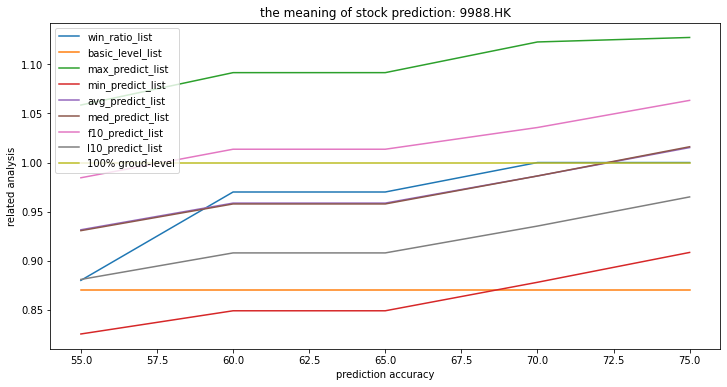

[*********************100%***********************]  1 of 1 completed
21 11
-------------------------------------->  1279935820800 3628800 352716
simulation times:  705432
21 12
-------------------------------------->  106661318400 362880 293930
simulation times:  587860
21 13
-------------------------------------->  8204716800 40320 203490
simulation times:  406980
1.0973024872560448 	 0.65 0.7448799258903342 0.9726337974070124
21 14
-------------------------------------->  586051200 5040 116280
simulation times:  232560
1.0973024872560448 	 0.7 0.7855097515105801 1.02911831909499
21 15
-------------------------------------->  39070080 720 54264
simulation times:  108528
1.0973024872560448 	 0.75 0.8323185367697602 1.0933517190625912


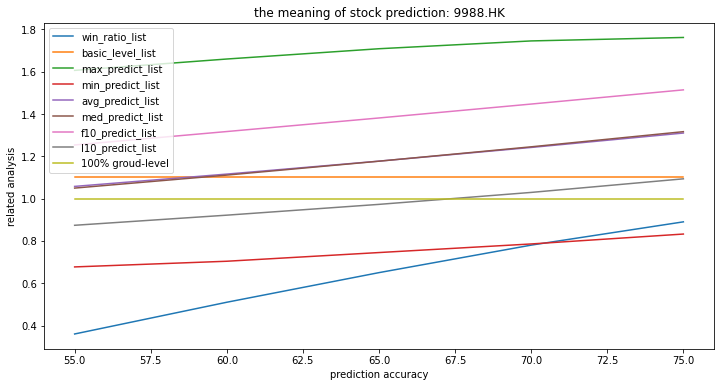

[*********************100%***********************]  1 of 1 completed
17 9
-------------------------------------->  980179200 40320 24310
simulation times:  48620
17 10
-------------------------------------->  98017920 5040 19448
simulation times:  38896
17 11
-------------------------------------->  8910720 720 12376
simulation times:  24752
0.9307201578345818 	 0.65 0.8608025774371771 0.936360416100875
17 11
-------------------------------------->  8910720 720 12376
simulation times:  24752
0.9307201578345818 	 0.7 0.8608025774371771 0.936360416100875
17 12
-------------------------------------->  742560 120 6188
simulation times:  12376
0.9307201578345818 	 0.75 0.893985456886236 0.9711255957925573


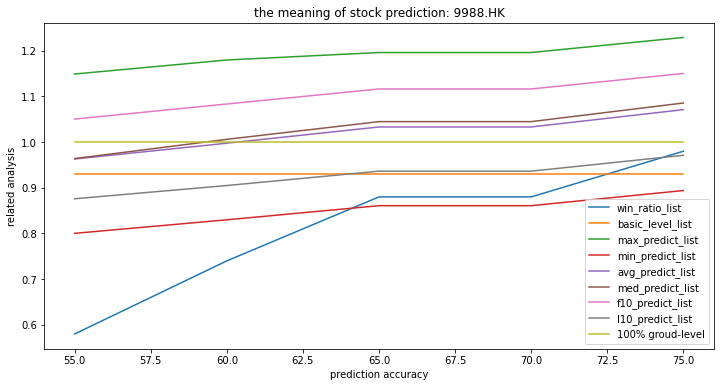

[*********************100%***********************]  1 of 1 completed
18 9
-------------------------------------->  17643225600 362880 48620
simulation times:  97240
18 10
-------------------------------------->  1764322560 40320 43758
simulation times:  87516
18 11
-------------------------------------->  160392960 5040 31824
simulation times:  63648
0.9461615018785956 	 0.65 0.8349632942930063 0.9493466946109996
18 12
-------------------------------------->  13366080 720 18564
simulation times:  37128
0.9461615018785956 	 0.7 0.8771968879688401 0.9912194399399699
18 13
-------------------------------------->  1028160 120 8568
simulation times:  17136
0.9461615018785956 	 0.75 0.9266609487297085 1.0362989510943452


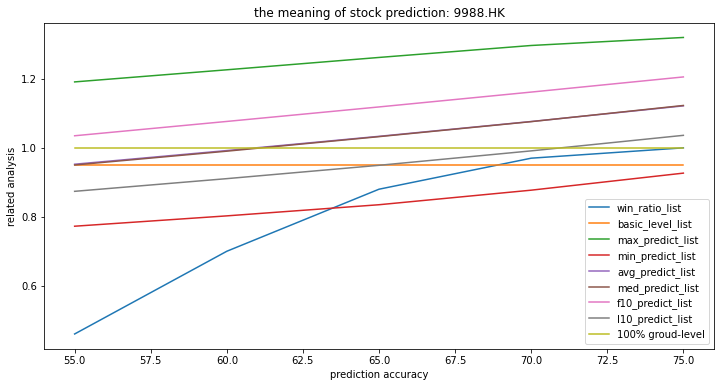

[*********************100%***********************]  1 of 1 completed
19 10
-------------------------------------->  33522128640 362880 92378
simulation times:  184756
19 11
-------------------------------------->  3047466240 40320 75582
simulation times:  151164
19 12
-------------------------------------->  253955520 5040 50388
simulation times:  100776
1.2103594275566794 	 0.65 0.9754717290335778 1.0909872973690125
19 13
-------------------------------------->  19535040 720 27132
simulation times:  54264
1.2103594275566794 	 0.7 1.0128005033019798 1.1333703255979641
19 14
-------------------------------------->  1395360 120 11628
simulation times:  23256
1.2103594275566794 	 0.75 1.063824512001845 1.1764598341594714


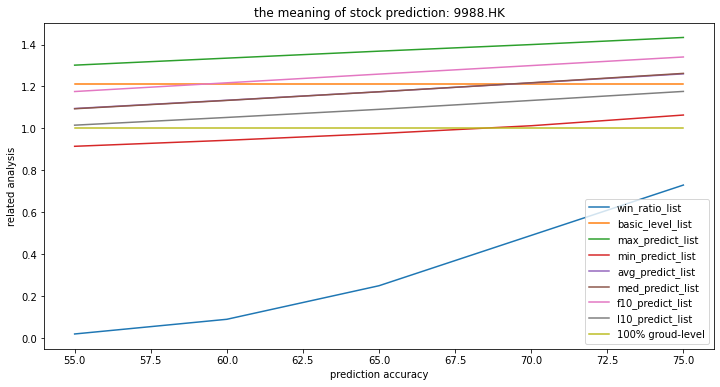

[*********************100%***********************]  1 of 1 completed
19 10
-------------------------------------->  33522128640 362880 92378
simulation times:  184756
19 11
-------------------------------------->  3047466240 40320 75582
simulation times:  151164
19 12
-------------------------------------->  253955520 5040 50388
simulation times:  100776
0.8224381712367774 	 0.65 0.8019434884312303 0.8957957421371741
19 13
-------------------------------------->  19535040 720 27132
simulation times:  54264
0.8224381712367774 	 0.7 0.8330999106579481 0.9221417058848339
19 14
-------------------------------------->  1395360 120 11628
simulation times:  23256
0.8224381712367774 	 0.75 0.8637968451217692 0.9490384133039811


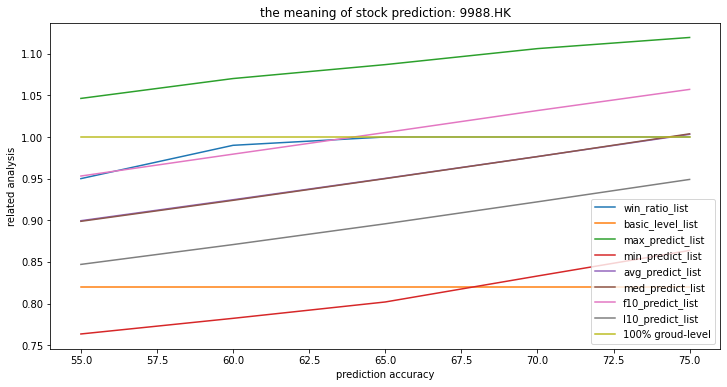

[*********************100%***********************]  1 of 1 completed
21 11
-------------------------------------->  1279935820800 3628800 352716
simulation times:  705432
21 12
-------------------------------------->  106661318400 362880 293930
simulation times:  587860
21 13
-------------------------------------->  8204716800 40320 203490
simulation times:  406980
1.0624999840344693 	 0.65 0.9075725529467259 1.0018281054580511
21 14
-------------------------------------->  586051200 5040 116280
simulation times:  232560
1.0624999840344693 	 0.7 0.9280881713002024 1.0262599980780742
21 15
-------------------------------------->  39070080 720 54264
simulation times:  108528
1.0624999840344693 	 0.75 0.9559971500036342 1.0514434980214262


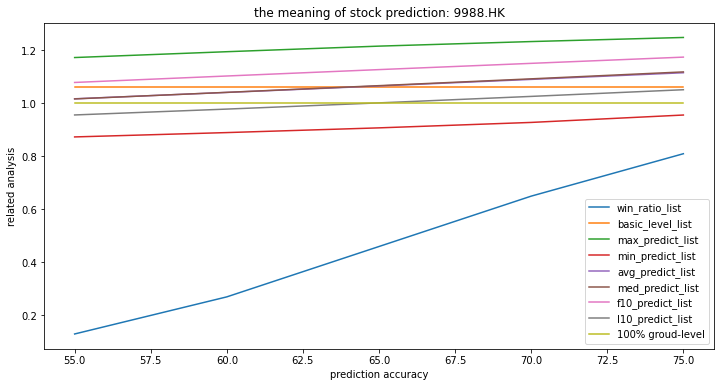

[*********************100%***********************]  1 of 1 completed
19 10
-------------------------------------->  33522128640 362880 92378
simulation times:  184756
19 11
-------------------------------------->  3047466240 40320 75582
simulation times:  151164
19 12
-------------------------------------->  253955520 5040 50388
simulation times:  100776
0.8335141108221725 	 0.65 0.8544849071132393 0.9084335587383354
19 13
-------------------------------------->  19535040 720 27132
simulation times:  54264
0.8335141108221725 	 0.7 0.8812817383558861 0.9299455293584388
19 14
-------------------------------------->  1395360 120 11628
simulation times:  23256
0.8335141108221725 	 0.75 0.9088217578391865 0.9522108522381524


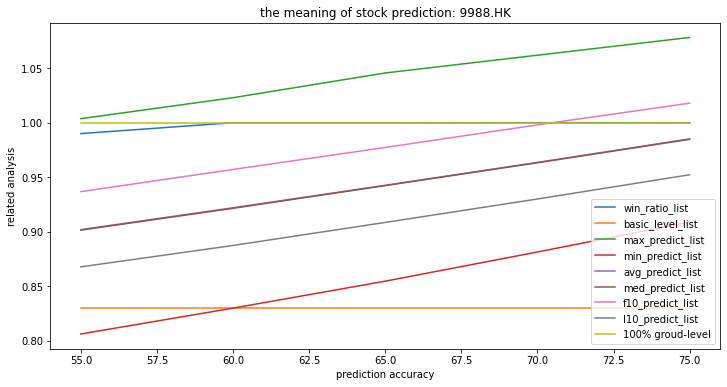

[*********************100%***********************]  1 of 1 completed
18 9
-------------------------------------->  17643225600 362880 48620
simulation times:  97240
18 10
-------------------------------------->  1764322560 40320 43758
simulation times:  87516
18 11
-------------------------------------->  160392960 5040 31824
simulation times:  63648
0.7952350133492293 	 0.65 0.789897313032876 0.8600959931933672
18 12
-------------------------------------->  13366080 720 18564
simulation times:  37128
0.7952350133492293 	 0.7 0.8215383546973783 0.8919010363840453
18 13
-------------------------------------->  1028160 120 8568
simulation times:  17136
0.7952350133492293 	 0.75 0.8549941799168491 0.9258409390558022


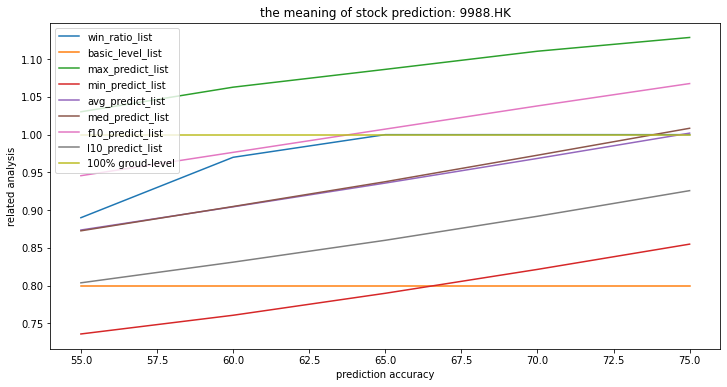

[*********************100%***********************]  1 of 1 completed
13 7
-------------------------------------->  1235520 720 1716
simulation times:  3432
13 7
-------------------------------------->  1235520 720 1716
simulation times:  3432
13 8
-------------------------------------->  154440 120 1287
simulation times:  2574
1.2095309953682305 	 0.65 0.9244514575193888 1.0475576167488003
13 9
-------------------------------------->  17160 24 715
simulation times:  1430
1.2095309953682305 	 0.7 0.9650916354927231 1.0995457932682213
13 9
-------------------------------------->  17160 24 715
simulation times:  1430
1.2095309953682305 	 0.75 0.9650916354927231 1.0995457932682213


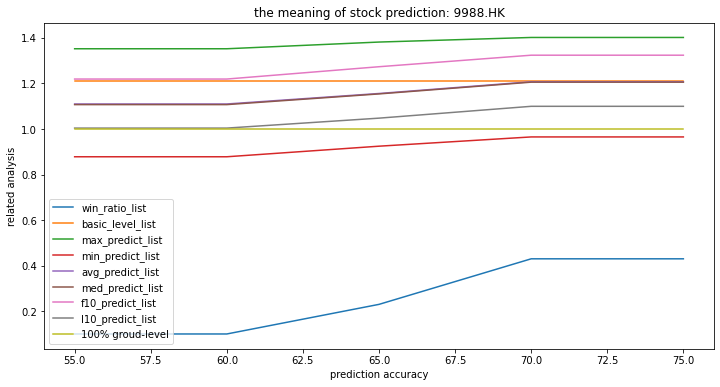

In [5]:
###
# 0005.HK:滙豐控股, 1299.HK:友邦保險, 0700.HK:騰訊控股, 9988.HK:阿⾥巴巴, 3690.HK:美團 # AAPL
hk_tickers = ["9988.HK", "3690.HK", "0700.HK", "9618.HK", "0981.HK", "9999.HK", "1810.HK", "1024.HK", "9888.HK", "2015.HK", "9866.HK"]
hk_tickers = ["3690.HK", "9618.HK", "1024.HK", "9866.HK"]

month_list = [
    ("2022-01-01", "2022-01-31"), ("2022-02-01", "2022-02-28"), ("2022-03-01", "2022-03-31"),
    ("2022-04-01", "2022-04-30"), ("2022-05-01", "2022-05-31"), ("2022-06-01", "2022-06-30"),
    ("2022-07-01", "2022-07-31"), ("2022-08-01", "2022-08-31"), ("2022-09-01", "2022-09-30"),
    ("2022-10-01", "2022-10-31"), ("2022-11-01", "2022-11-30"), ("2022-12-01", "2022-12-31")
]

#tn = "9988.HK" 
for tn in hk_tickers[:1]:
  tn = "9988.HK" 
  for it in month_list[:-1]:
    st, et = it
    x, ys, simulation_data = prediction_analysis(tn, st, et)
    draw_lines(x, ys)
  

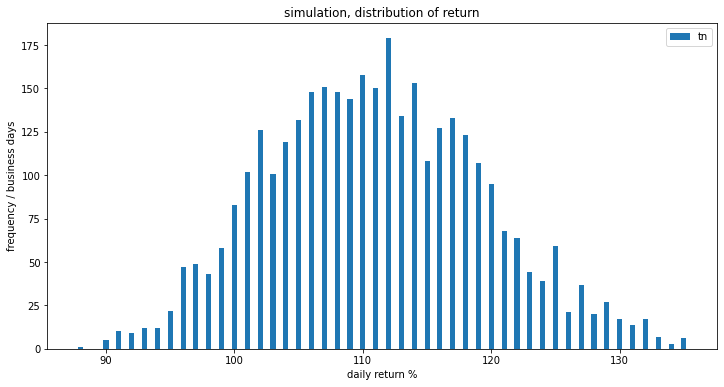

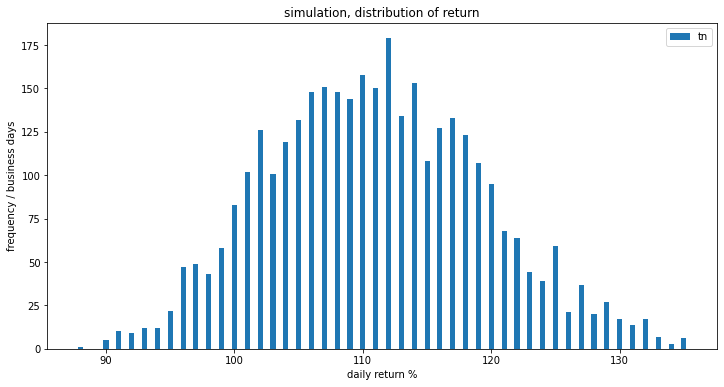

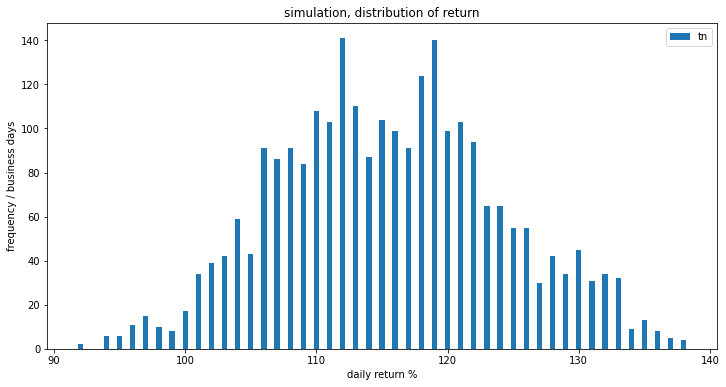

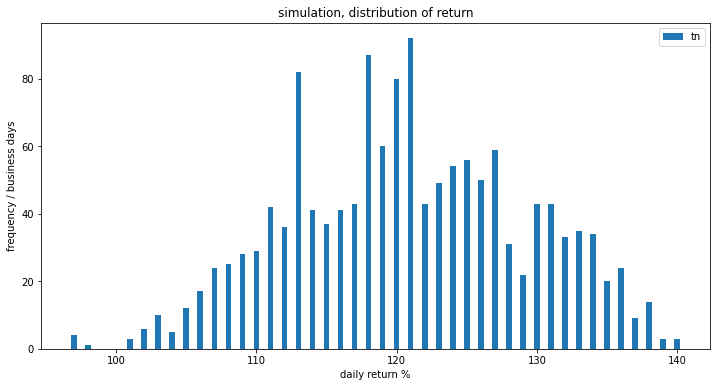

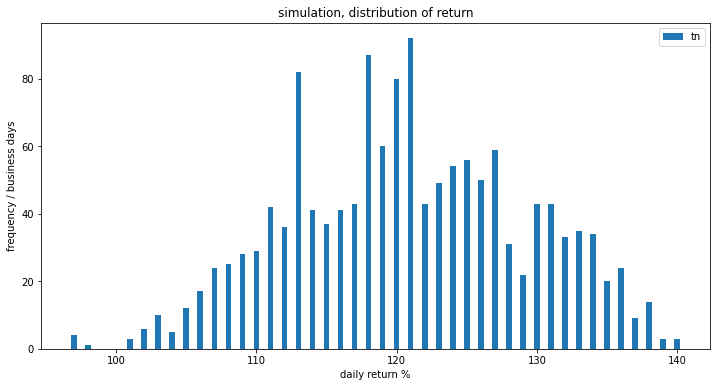

In [13]:
# 


def binning_frequency(daily_returns, bin_width=0.01):
    tmp_list = sorted(daily_returns)
    mn, mx = tmp_list[0], tmp_list[-1]
    bin_dic = {} # 
    tmp_scale = round( 1/bin_width )
    for v in tmp_list:
        if math.isnan(v):
            continue
        v1 = round(v * tmp_scale)
        if v1 not in bin_dic:
            bin_dic[v1] = 1
        else:
            bin_dic[v1] += 1
    return bin_dic

def dic_lists(bin_dic):
  x_list, y_list = [], []
  for k in sorted(list(bin_dic.keys())):
    v = bin_dic[k]
    x_list.append(k)
    y_list.append(v)

  return x_list, y_list

for key in simulation_data.keys():
  bin_dic = binning_frequency(simulation_data[key])
  bin_dic

  x_list, y_list = dic_lists(bin_dic)

  fig = plt.subplots(figsize =(12, 6))
  #plt.plot(x_list, y_list, label = "tn") # , color ='r'
  plt.bar(x_list, y_list, width = 0.4, label = "tn")
  #plt.xticks(x_axis)
  #plt.yticks(y_axis)    
  plt.title("simulation, distribution of return")
  plt.xlabel('daily return %')
  plt.ylabel("frequency / business days")
  plt.legend()
  plt.show()

In [12]:
### permutation calculator
# it does not consider the order, so it is Cn
def permutation_Cn(n, m):
  print(n, m)
  # n! / ( m! * (n-m)! )
    # v1 = (m+1)*(m+2)*...*n 
    # v2 = 1*2*..*(n-m)
    # v3 = v1/v2
  v1 = 1
  i = m+1
  while i<=n:
    v1 = v1 * i
    i += 1
  v2 = 1
  i = 1
  while i<=(n-m):
    v2 = v2 * i
    i += 1
  return v1, v2, round(v1/v2)

# 50%, Cn(40, 20) = 137,846,528,820
# 60%, Cn(40, 24) = 62,852,101,650
# 65%, Cn(40, 26) = 23,206,929,840
# 70%, Cn(40, 28) = 5,586,853,480
permutation_Cn(40, 28) 


40 28


(2676111755885568000, 479001600, 5586853480)